<a href="https://colab.research.google.com/github/venkat2020-github/DeepLearning/blob/main/DL_Q1_of_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Install the Kaggle library
! pip install kaggle

In [ ]:
#2. Make a directory named “.kaggle”
! mkdir ~/.kaggle

In [ ]:
#3. Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [ ]:
#4. Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#5. Downloading Competitions dataset:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:28<00:00, 56.2MB/s]
100% 2.29G/2.29G [00:28<00:00, 85.4MB/s]


In [ ]:
! unzip chest-xray-pneumonia.zip

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import random

# folder
import cv2
import os
import PIL

#import image
from PIL import Image

#import visualization
import matplotlib.pyplot as plt
plt.rc('image', cmap='gray')

#Reading the image
import matplotlib.image as mping

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Loading Data
train_path = '/content/chest_xray/train'
valid_path = '/content/chest_xray/val'
test_path = '/content/chest_xray/test'

In [ ]:
train_datagen = ImageDataGenerator(rotation_range = 20, width_shift_range = 0.3,
                                   validation_split = 0.1)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path, target_size = (224,224), class_mode = 'sparse',
                                                    subset = 'training', shuffle = True)

Found 4695 images belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(train_path, target_size = (224,224), class_mode = 'sparse',
                                                  subset = 'validation', shuffle = True)

Found 521 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_data = test_datagen.flow_from_directory(test_path, target_size = (224, 224), class_mode = 'sparse')

Found 624 images belonging to 2 classes.


In [ ]:
#Installing GPUtil, The GPUtil library available for pip installation provides simple methods to check.
!pip install GPUtil

  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=0a8f8f93896d589a9fb7faa4ec2ee4f4c559235311fd3c94fa314e7776385097
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil


In [ ]:
import GPUtil as GPU
GPU.getAvailable #This is to check the availability of GPU in Google Colab.

<function GPUtil.GPUtil.getAvailable>

In [ ]:
#Checking the available adress for GPU
import torch
use_cuda = torch.cuda.is_available
print(use_cuda)

<function is_available at 0x7fdb69d02050>


In [ ]:
import pathlib
data_dir = pathlib.Path('/content/chest_xray/')
data_dir

PosixPath('/content/chest_xray')

In [ ]:
list(data_dir.glob('*/*/*.jpeg'))

In [ ]:
#lenth of the listed images
len(list(data_dir.glob('*/*/*.jpeg')))

5856

In [ ]:
normal = list(data_dir.glob('*/NORMAL/*.jpeg'))
normal[:]

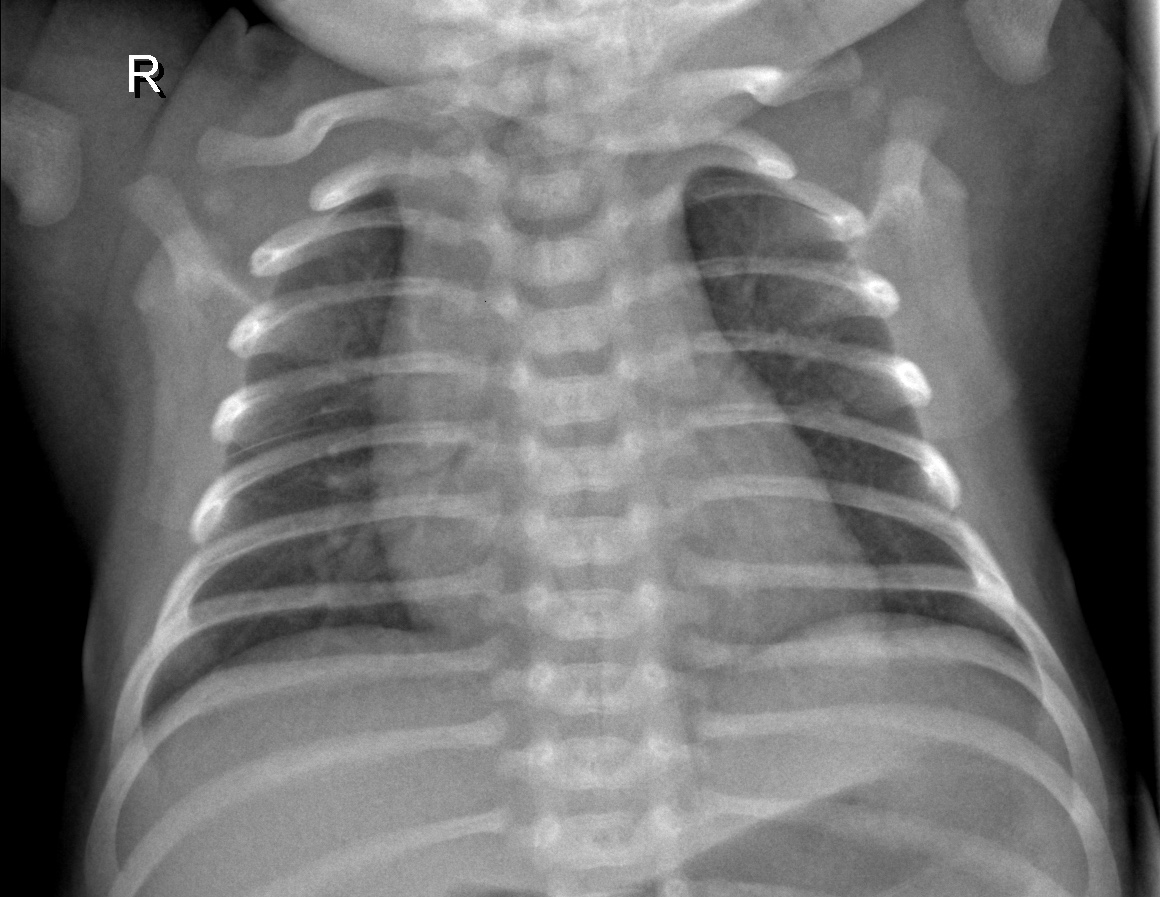

In [ ]:
PIL.Image.open(str(normal[1]))

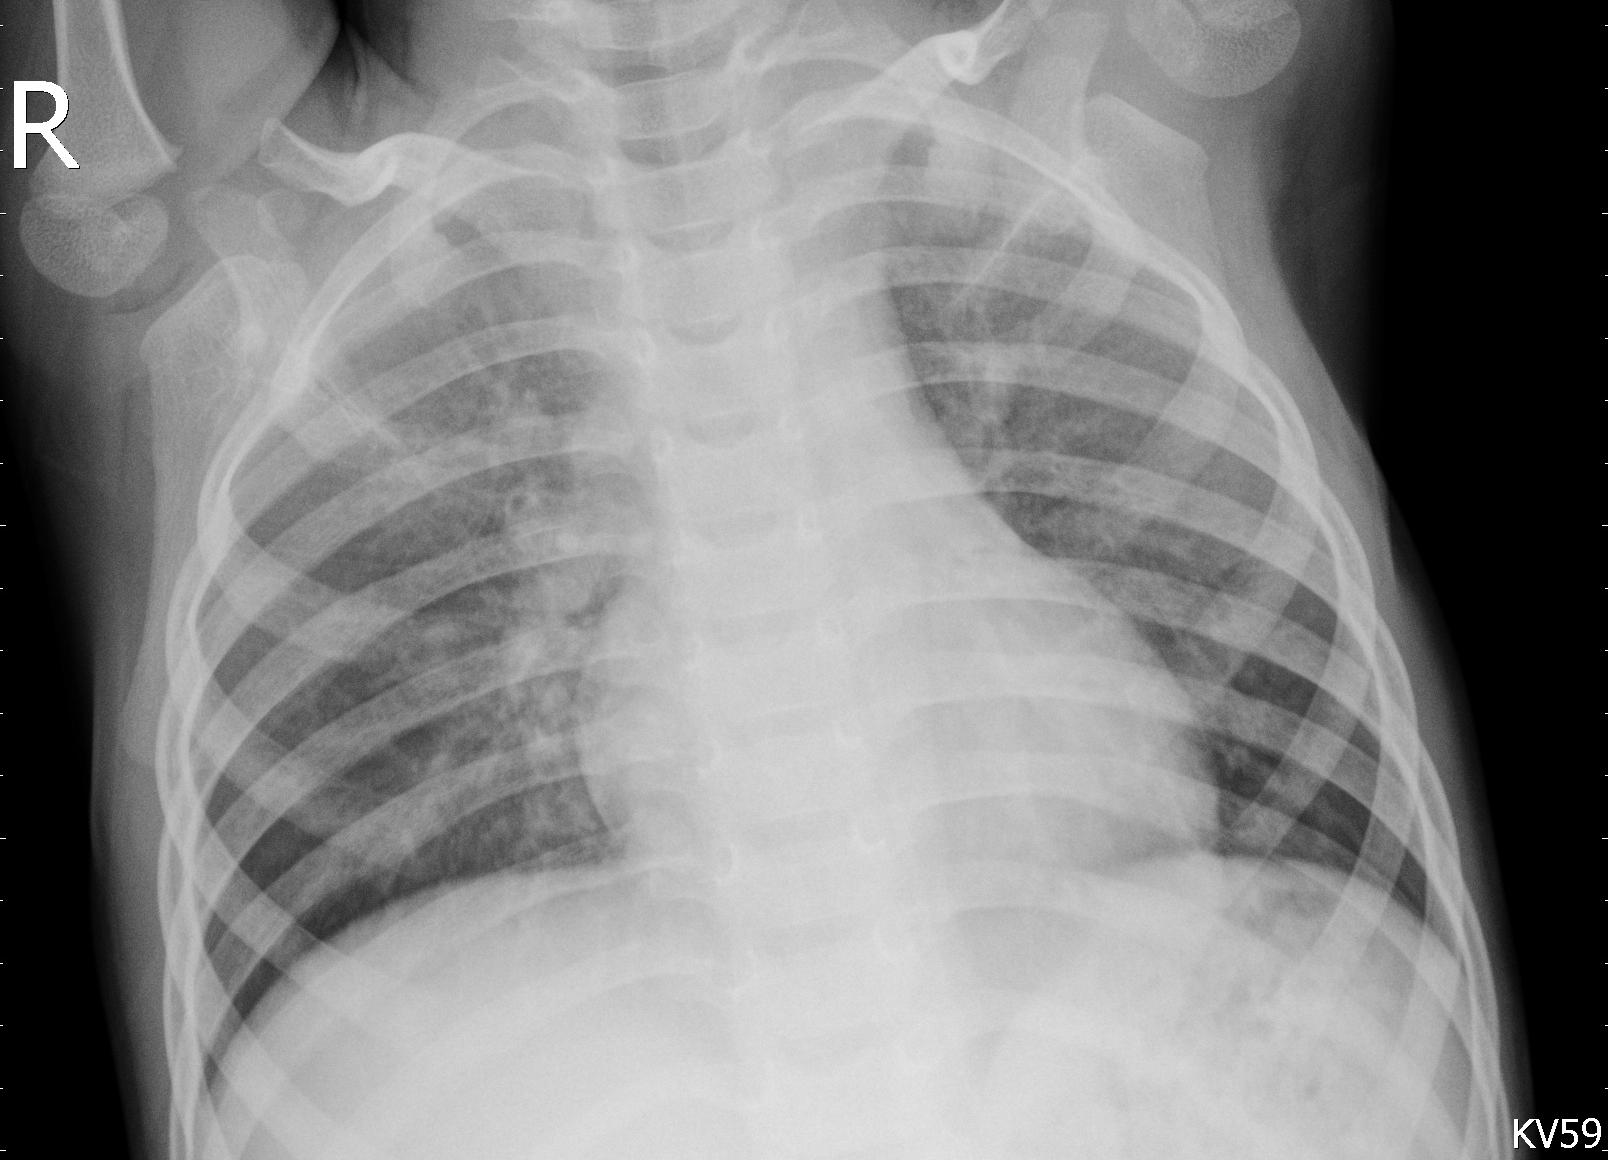

In [ ]:
pneumonia = list(data_dir.glob('*/PNEUMONIA/*.jpeg'))
pneumonia[:]
PIL.Image.open(str(pneumonia[1]))

In [ ]:
xray_images_dict = {
    'testnormal': list(data_dir.glob('test/NORMAL/*.jpeg')),
    'testpneumonia': list(data_dir.glob('test/PNEUMONIA/*.jpeg')),
    'trainnormal': list(data_dir.glob('train/NORMAL/*.jpeg')),
    'trainpneumonia': list(data_dir.glob('train/PNEUMONIA/*.jpeg')),
    'valnormal': list(data_dir.glob('val/NORMAL/*.jpeg')),
    'valpneumonia': list(data_dir.glob('val/PNEUMONIA/*.jpeg'))
}

In [ ]:
str(xray_images_dict['testnormal'][0])

'/content/chest_xray/test/NORMAL/NORMAL2-IM-0294-0001.jpeg'

In [ ]:
str(xray_images_dict['trainnormal'][0])

'/content/chest_xray/train/NORMAL/NORMAL2-IM-0416-0001.jpeg'

In [ ]:
str(xray_images_dict['valnormal'][0])

'/content/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg'

In [ ]:
img = cv2.imread(str(xray_images_dict['trainnormal'][0]))
img.shape

(1341, 1624, 3)

In [ ]:
cv2.resize(img,(1800,1800)).shape #resizing the images

(1800, 1800, 3)

In [ ]:
#X, y = [], []

for xray_name, images in xray_images_dict.items():
  print(xray_name)
  print(len(images))

testnormal
234
testpneumonia
390
trainnormal
1341
trainpneumonia
3875
valnormal
8
valpneumonia
8


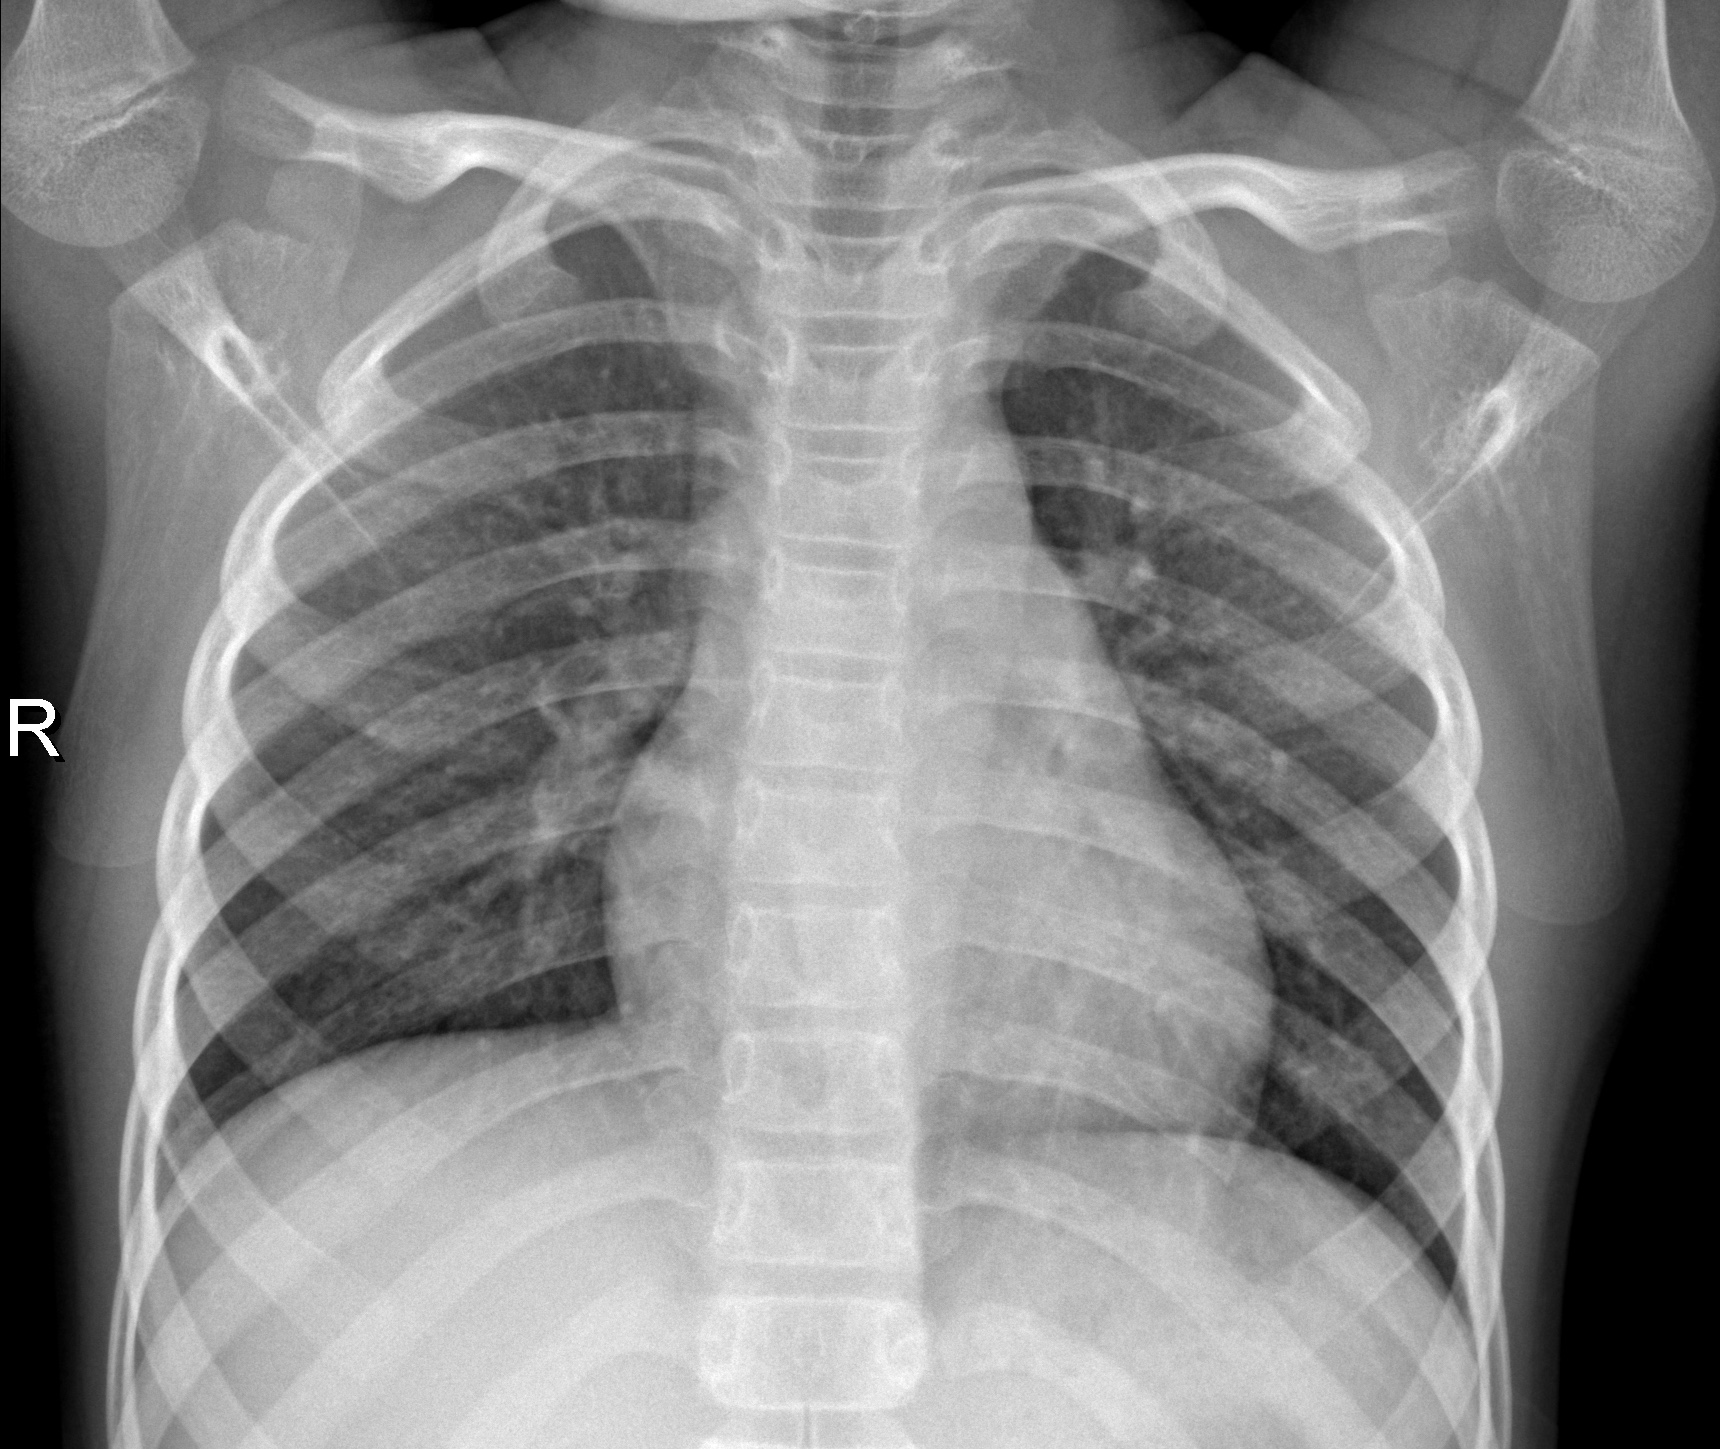

In [ ]:
#The Data augmentations used in Deep Learning:
#1. Random Rotation
#2. Flip (Horizontal and Vertical)
#3. Zoom
#4. Random Shift
#5. Brightness

from keras.preprocessing.image import load_img
image = load_img('/content/chest_xray/train/NORMAL/NORMAL2-IM-1280-0001.jpeg')
image

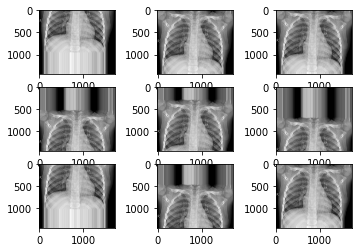

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import img_to_array

# Height shift image augmentation

# convert to numpy array
data = img_to_array(image)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

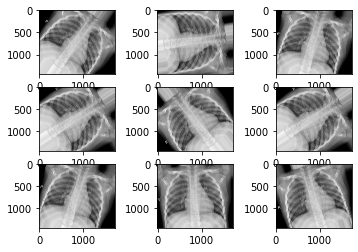

In [ ]:
# Rotation shift image augmentation

# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

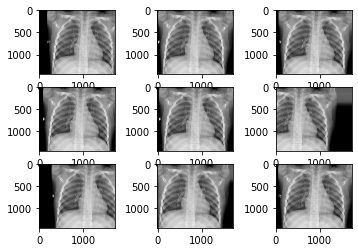

In [ ]:
# Width shift image augmentation

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=0.2)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

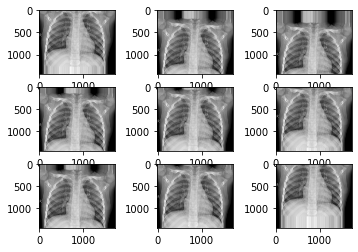

In [ ]:
# Height shift image augmentation

# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.2)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1/255.)
val_image_generator = ImageDataGenerator(rescale=1/255.)

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 224

In [ ]:
train_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                directory= train_path,
                                                shuffle = True,
                                                target_size = (IMG_SIZE, IMG_SIZE))

Found 5216 images belonging to 2 classes.


In [ ]:
val_gen = val_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                directory= valid_path,
                                                target_size = (IMG_SIZE, IMG_SIZE))

Found 16 images belonging to 2 classes.


In [ ]:
test_gen = val_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                directory= test_path,
                                                target_size = (IMG_SIZE, IMG_SIZE))

Found 624 images belonging to 2 classes.


In [ ]:
for item in train_gen:
    images,labels = item
    print(images.shape)
    print(labels.shape)
    break

(32, 224, 224, 3)
(32, 2)


In [ ]:
#Dataset is imbalanced and small
vgg = tf.keras.applications.VGG16(include_top = False, 
                                  weights='imagenet', 
                                  input_shape = (IMG_SIZE, IMG_SIZE, 3))
resnet50v2 = tf.keras.applications.ResNet50V2(include_top = False, 
                                  weights='imagenet', 
                                  input_shape = (IMG_SIZE, IMG_SIZE, 3))

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
#MODEL BUILDING
model  = tf.keras.Sequential([
        resnet50v2,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              metrics=[
                  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
              ], 
              optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 256)               25690368  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                

In [ ]:
model  = tf.keras.Sequential([
        resnet50v2,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              metrics=[
                  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
              ], 
              optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-4))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 256)               25690368  
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 2)                

In [ ]:
model  = tf.keras.Sequential([
        resnet50v2,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              metrics=[
                  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
              ], 
              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0001))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_18 (Dense)            (None, 256)               25690368  
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 2)                

In [ ]:
#history = model.fit(train_gen, epochs=3, validation_data=val_gen) ==> IT WILL TAKE 2hrs min time for execution.

Epoch 1/3
163/163 [==============================] - 3283s 20s/step - loss: 0.1352 - accuracy: 0.9557 - precision: 0.9557 - recall: 0.9557 - val_loss: 0.1040 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/3
163/163 [==============================] - 3184s 20s/step - loss: 0.0340 - accuracy: 0.9887 - precision: 0.9887 - recall: 0.9887 - val_loss: 2.0375 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875
Epoch 3/3
163/163 [==============================] - 3091s 19s/step - loss: 0.0257 - accuracy: 0.9914 - precision: 0.9914 - recall: 0.9914 - val_loss: 4.3592 - val_accuracy: 0.5625 - val_precision: 0.5625 - val_recall: 0.5625


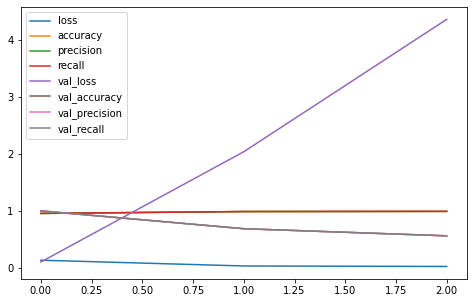

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))

# New Section

In [ ]:
#Hyperparameter Tuning:
